# Building a binary classifier using linear regression

In this code, we generate two classes of data with 2D input x and 1D output y. Inputs for each class are drawn randomly from a bivariate normal distribution unique to that class. We then use a linear regression model to draw the decision boundary separating these two classes.

## Generating inputs for y = 0 (red x's)

<IPython.core.display.Javascript object>


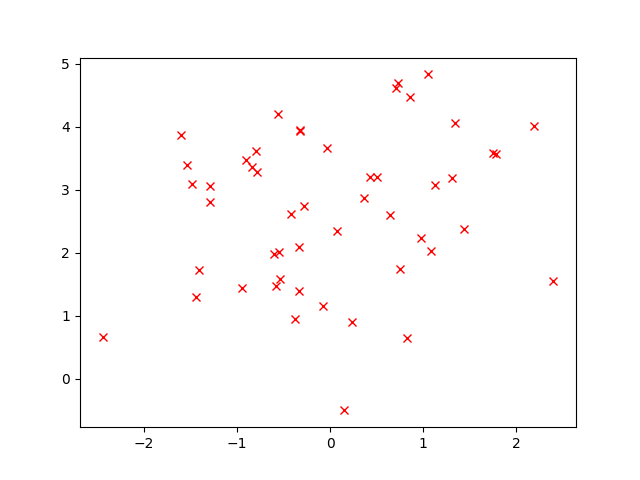

In [5]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np, pickle
from sklearn import linear_model
from itertools import product as car_pro

#y = 0 data
x_train = np.random.multivariate_normal(mean = [0, 3], cov = [[1, 0], [0, 1]], size = 50)
y_train = np.full(shape = (50), fill_value = 0.)

#plotting
ax = plt.subplots()[1]
ax.plot(x_train[y_train == 0, 0], x_train[y_train == 0, 1], marker = 'x', linestyle = '', color = 'red')

## Generating inputs for y = 1 (blue o's)

<IPython.core.display.Javascript object>


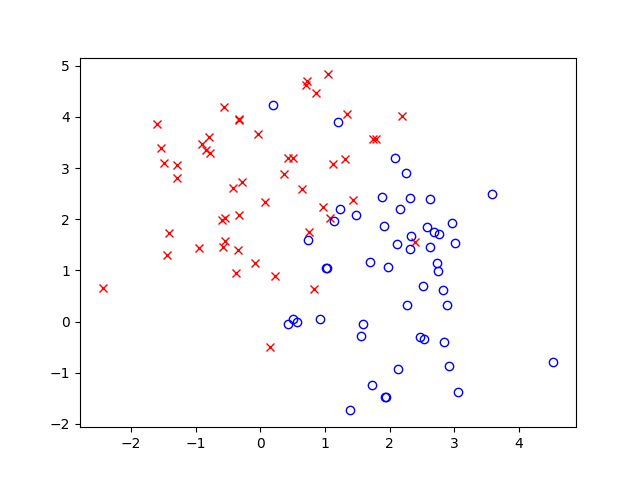

In [6]:
#y = 1 data
x_train = np.append(x_train, np.random.multivariate_normal(mean = [2, 1], cov = [[1, 0], [0, 2]], size = 50), axis = 0)
y_train = np.append(y_train, np.full(shape = (50), fill_value = 1.), axis = 0)

#plotting
ax = pickle.loads(pickle.dumps(ax))
ax.plot(x_train[y_train == 1, 0], x_train[y_train == 1, 1], marker = 'o', linestyle = '', color = 'blue', markerfacecolor = 'none')

# Training linear model with inputs

In [7]:
#train regression model
model = linear_model.LinearRegression()
model.fit(X = x_train, y = y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Testing model and generating decision boundary

We discretize the space surrounding the inputs and test the model on this space. The decision boundary is the subspace where y ~= 0.5.

<IPython.core.display.Javascript object>


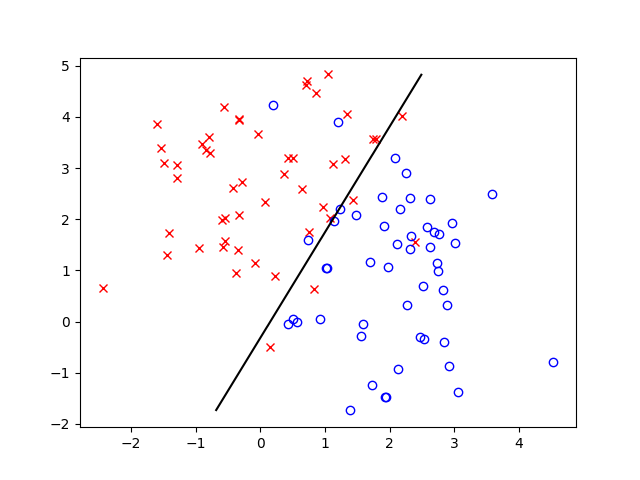

In [8]:
#discretize x space
grid_x_points = 1000
x1_test_min, x1_test_max, x2_test_min, x2_test_max = np.amin(x_train[:, 0]), np.amax(x_train[:, 0]), np.amin(x_train[:, 1]), np.amax(x_train[:, 1])
x_test = np.dstack(np.mgrid[x1_test_min : x1_test_max : (x1_test_max - x1_test_min)/grid_x_points, x2_test_min : x2_test_max : (x2_test_max - x2_test_min)/grid_x_points]).reshape(-1, 2)

#predict y for x space and find x where y = 0.5
y_test = model.predict(X = x_test)
tolerance = 0.0001
x_boundary = x_test[np.abs(y_test - 0.5) <= tolerance]

#plotting
ax = pickle.loads(pickle.dumps(ax))
ax.plot(x_boundary[:, 0], x_boundary[:, 1], linestyle = '-', marker = '', color = 'black')
